## Random Forest - Credit Default Prediction

In this lab, we will build a random forest model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [5]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

# Data Preparation and Model Building

In [6]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf_default = RandomForestClassifier()

In [9]:
rf_default.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# Making predictions
predictions = rf_default.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [12]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7058
           1       0.60      0.31      0.41      1942

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [13]:
print(confusion_matrix(y_test,predictions))

[[6658  400]
 [1331  611]]


In [14]:
print(accuracy_score(y_test,predictions))

0.8076666666666666


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [15]:
hyper_param = {'max_depth': range(2,20,5)}

In [16]:
from sklearn.model_selection import KFold

In [17]:
folds = KFold(n_splits=5, shuffle=True, random_state=100)

In [18]:
# instantiate the model
rf_1 = RandomForestClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
grid_cv_1 = GridSearchCV(estimator=rf_1, param_grid=hyper_param, scoring='accuracy',
                        cv=folds, n_jobs=-1, verbose=4, return_train_score=True)

In [21]:
grid_cv_1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=4)

In [22]:
score_1 = pd.DataFrame(grid_cv_1.cv_results_)

In [23]:
score_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.318755,0.081252,0.012500,0.006250,2,{'max_depth': 2},0.800476,0.810238,0.798571,0.797381,...,0.800238,0.005360,4,0.800476,0.800833,0.803036,0.796131,0.803690,0.800833,0.002655
1,0.488912,0.035583,0.012500,0.006250,7,{'max_depth': 7},0.810000,0.821905,0.808095,0.815714,...,0.813095,0.005102,1,0.832143,0.824643,0.825655,0.829286,0.833452,0.829036,0.003463
2,0.728133,0.015938,0.018751,0.006251,12,{'max_depth': 12},0.807857,0.816429,0.814524,0.809286,...,0.810095,0.004998,2,0.881250,0.877798,0.879583,0.877917,0.885357,0.880381,0.002789
3,0.884384,0.030619,0.015626,0.000001,17,{'max_depth': 17},0.796667,0.811190,0.803333,0.808810,...,0.804190,0.005257,3,0.924583,0.927262,0.928095,0.925952,0.929464,0.927071,0.001688


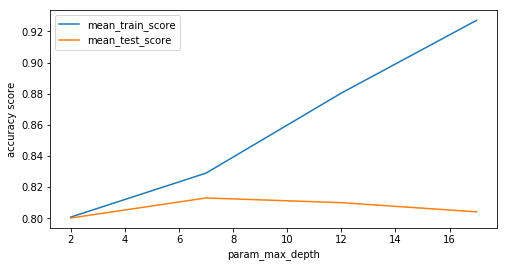

In [24]:
# ploting result
plt.figure(figsize=(8,4))
plt.plot(score_1['param_max_depth'], score_1['mean_train_score'])
plt.plot(score_1['param_max_depth'], score_1['mean_test_score'])

plt.xlabel('param_max_depth')
plt.ylabel('accuracy score')
plt.legend(loc='best')


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [25]:
hyper_param = {'n_estimators':range(100,1500,400)}

In [26]:
rfc_2 = RandomForestClassifier(max_depth=4)

In [27]:
grid_cv_2 = GridSearchCV(estimator=rfc_2, param_grid=hyper_param, scoring='accuracy', n_jobs=-1,
                        verbose=4, cv=folds, return_train_score=True)

In [28]:
grid_cv_2.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=4)

In [29]:
score_2 = pd.DataFrame(grid_cv_2.cv_results_)

In [30]:
score_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.335729,0.255286,0.081251,0.030297,100,{'n_estimators': 100},0.809048,0.819524,0.805476,0.812619,...,0.810619,0.005095,1,0.812262,0.809643,0.811369,0.814881,0.814048,0.812440,0.001873
1,14.679993,0.262984,0.386027,0.018422,500,{'n_estimators': 500},0.809286,0.818333,0.807143,0.811190,...,0.810476,0.004270,2,0.812321,0.808690,0.813036,0.811071,0.812679,0.811560,0.001580
2,26.277488,0.639292,0.670423,0.014473,900,{'n_estimators': 900},0.808095,0.817857,0.806190,0.811905,...,0.810000,0.004470,4,0.811429,0.808750,0.812440,0.812262,0.813036,0.811583,0.001507
3,34.686674,1.957014,0.876130,0.070285,1300,{'n_estimators': 1300},0.808333,0.819048,0.806667,0.810952,...,0.810238,0.004709,3,0.812202,0.808929,0.812560,0.812143,0.813155,0.811798,0.001479


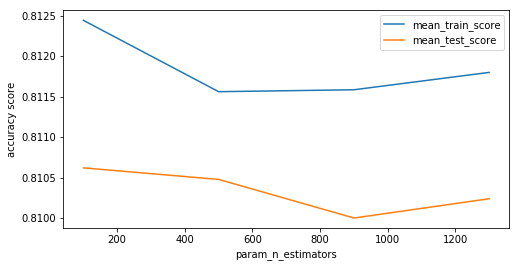

In [31]:
# plotting result
plt.figure(figsize=(8,4))
plt.plot(score_2['param_n_estimators'], score_2['mean_train_score'])
plt.plot(score_2['param_n_estimators'], score_2['mean_test_score'])
plt.xlabel('param_n_estimators')
plt.ylabel('accuracy score')
plt.legend(loc='best')

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [32]:
hyper_param = {'max_features':[4, 8, 14, 20, 24]}

In [33]:
rfc_3 = RandomForestClassifier(max_depth=4)

In [34]:
grid_cv_3 = GridSearchCV(estimator=rfc_3, param_grid=hyper_param, scoring='accuracy', n_jobs=-1,
                        cv=folds, verbose=4, return_train_score=True)

In [35]:
grid_cv_3.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=4)

In [36]:
score_3 = pd.DataFrame(grid_cv_3.cv_results_)

In [37]:
score_3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.313368,0.028748,0.015625,0.000002,4,{'max_features': 4},0.805476,0.820238,0.804762,0.810952,...,0.809857,0.005623,5,0.811726,0.808274,0.812857,0.811369,0.819405,0.812726,0.003668
1,0.523320,0.018935,0.004452,0.008904,8,{'max_features': 8},0.818571,0.823810,0.807381,0.819524,...,0.815714,0.006308,4,0.820417,0.819107,0.814107,0.819226,0.822679,0.819107,0.002810
2,0.857260,0.020660,0.014901,0.001450,14,{'max_features': 14},0.816190,0.826190,0.820476,0.820000,...,0.818429,0.005577,1,0.822857,0.820952,0.821429,0.820893,0.824048,0.822036,0.001231
3,1.159236,0.027637,0.010277,0.005838,20,{'max_features': 20},0.816667,0.822857,0.820476,0.819048,...,0.817952,0.004139,2,0.822738,0.820774,0.821250,0.821964,0.825417,0.822429,0.001635
4,1.261208,0.095749,0.012500,0.006250,24,{'max_features': 24},0.816667,0.825476,0.818810,0.818095,...,0.817333,0.005725,3,0.823155,0.820536,0.821429,0.821369,0.824286,0.822155,0.001364


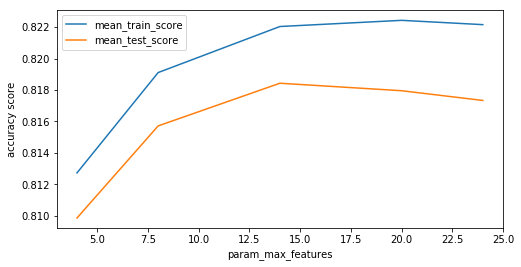

In [38]:
#plotting result
plt.figure(figsize=(8,4))
plt.plot(score_3['param_max_features'], score_3['mean_train_score'])
plt.plot(score_3['param_max_features'], score_3['mean_test_score'])
plt.xlabel('param_max_features')
plt.ylabel('accuracy score')
plt.legend(loc='best')


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [39]:
hyper_param = {'min_samples_leaf':range(100, 400, 50)}

In [40]:
rfc_4 = RandomForestClassifier()

In [41]:
grid_cv_4 = GridSearchCV(estimator=rfc_4, cv=folds, scoring='accuracy', param_grid=hyper_param,
                        verbose=4, n_jobs=-1, return_train_score=True)

In [42]:
grid_cv_4.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=4)

In [43]:
score_4 = pd.DataFrame(grid_cv_4.cv_results_)

In [44]:
score_4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.547732,0.019782,0.018751,0.006251,100,{'min_samples_leaf': 100},0.812143,0.823571,0.812619,0.816905,...,0.814952,0.004917,1,0.818333,0.813333,0.814167,0.818155,0.818929,0.816583,0.002342
1,0.504659,0.032848,0.015627,0.000002,150,{'min_samples_leaf': 150},0.806190,0.819286,0.805000,0.803810,...,0.807714,0.005841,4,0.809226,0.811190,0.811726,0.808214,0.809702,0.810012,0.001286
2,0.477901,0.014036,0.012576,0.006290,200,{'min_samples_leaf': 200},0.812857,0.819524,0.799286,0.801905,...,0.806762,0.008026,5,0.814821,0.809583,0.804881,0.805238,0.808274,0.808560,0.003603
3,0.437530,0.002086,0.014985,0.001471,250,{'min_samples_leaf': 250},0.803571,0.823095,0.803095,0.811190,...,0.808952,0.007678,3,0.803750,0.813690,0.809583,0.810714,0.807798,0.809107,0.003293
4,0.409408,0.014519,0.012500,0.006250,300,{'min_samples_leaf': 300},0.803333,0.818095,0.795952,0.809762,...,0.805619,0.007659,6,0.806786,0.806310,0.802679,0.808095,0.811250,0.807024,0.002773


In [45]:
#plotting result

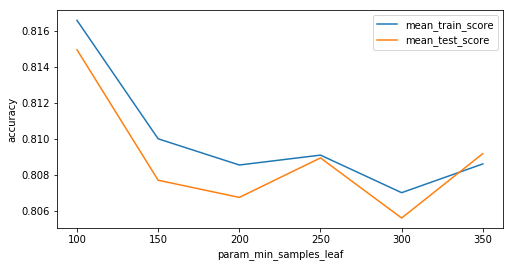

In [47]:
plt.figure(figsize=(8,4))
plt.plot(score_4['param_min_samples_leaf'], score_4['mean_train_score'])
plt.plot(score_4['param_min_samples_leaf'], score_4['mean_test_score'])
plt.xlabel('param_min_samples_leaf')
plt.ylabel('accuracy')
plt.legend(loc='best')

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [48]:
hyper_param = {'min_samples_split':range(200, 500, 50)}

rfc_5 = RandomForestClassifier()

grid_cv_5 = GridSearchCV(estimator=rfc_5, cv=folds, scoring='accuracy', param_grid=hyper_param,
                        verbose=4, n_jobs=-1, return_train_score=True)

grid_cv_5.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=4)

In [49]:
score_5 = pd.DataFrame(grid_cv_5.cv_results_)

In [50]:
score_5.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.736540,0.021266,0.017494,0.001871,200,{'min_samples_split': 200},0.817143,0.826429,0.819048,0.821905,...,0.818905,0.005441,1,0.824643,0.823333,0.823631,0.824643,0.826131,0.824476,0.000981
1,0.712515,0.022204,0.022538,0.007579,250,{'min_samples_split': 250},0.815000,0.822143,0.817857,0.815476,...,0.815857,0.004337,5,0.821845,0.819762,0.820952,0.819286,0.824524,0.821274,0.001856
2,0.691746,0.009894,0.018092,0.006738,300,{'min_samples_split': 300},0.817857,0.821190,0.818095,0.817619,...,0.816238,0.005074,3,0.822202,0.817083,0.820119,0.820417,0.822381,0.820440,0.001910
3,0.657084,0.032564,0.012502,0.006251,350,{'min_samples_split': 350},0.815238,0.827143,0.818571,0.818095,...,0.817524,0.005989,2,0.819464,0.818869,0.819702,0.817679,0.822679,0.819679,0.001655
4,0.669082,0.027474,0.015701,0.000149,400,{'min_samples_split': 400},0.815952,0.818333,0.816429,0.816190,...,0.814571,0.004391,6,0.821071,0.815000,0.816845,0.816905,0.815595,0.817083,0.002124


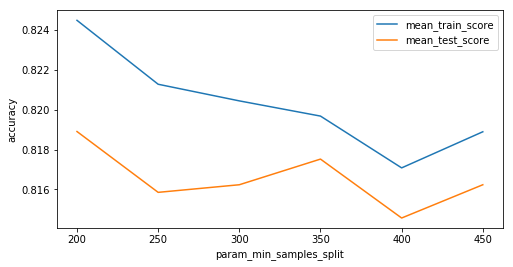

In [52]:
#plotting result
plt.figure(figsize=(8,4))
plt.plot(score_5['param_min_samples_split'], score_5['mean_train_score'])
plt.plot(score_5['param_min_samples_split'], score_5['mean_test_score'])
plt.xlabel('param_min_samples_split')
plt.ylabel('accuracy')
plt.legend(loc='best')

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.


In [53]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [54]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [55]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8182857142857143 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [57]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [58]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
# predict
predictions = rfc.predict(X_test)

# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

   micro avg       0.83      0.83      0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [61]:
print(confusion_matrix(y_test,predictions))

[[6755  303]
 [1256  686]]
